In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib.image as mpimg # для работы с jpg, png и преобразования из в массив numpy

In [5]:
image_as_array = mpimg.imread('../DATA/palm_trees.jpg')

In [6]:
image_as_array.shape # H, W, C

(1401, 934, 3)

In [7]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

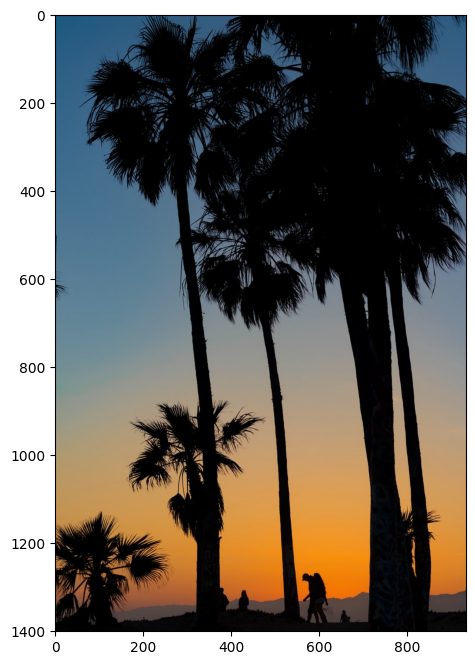

In [11]:
plt.figure(figsize=(12,8))
plt.imshow(image_as_array); # imshow работает только с массивами numpy

In [14]:
# (H, W, C) ---> 2D (H*W, C)
(h, w, c) = image_as_array.shape

print(h)
print(w)
print(c)

1401
934
3


In [15]:
image_as_array_2d = image_as_array.reshape(h*w,c)
image_as_array_2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], shape=(1308534, 3), dtype=uint8)

In [16]:
image_as_array_2d.shape

(1308534, 3)

In [21]:
image_as_array.shape

(1401, 934, 3)

In [22]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6)
labels = model.fit_predict(image_as_array_2d)

In [23]:
labels

array([2, 2, 2, ..., 5, 5, 5], shape=(1308534,), dtype=int32)

In [26]:
rgb_codes = model.cluster_centers_.round(0).astype(int)
rgb_codes

array([[157, 149, 136],
       [ 39,  46,  55],
       [ 77, 113, 139],
       [215, 144,  65],
       [103,  77,  63],
       [  2,   2,   3]])

In [27]:
rgb_codes[labels]

array([[ 77, 113, 139],
       [ 77, 113, 139],
       [ 77, 113, 139],
       ...,
       [  2,   2,   3],
       [  2,   2,   3],
       [  2,   2,   3]], shape=(1308534, 3))

In [28]:
image_as_array_2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], shape=(1308534, 3), dtype=uint8)

In [29]:
quantized_image = np.reshape(rgb_codes[labels], (h,w,c))
quantized_image

array([[[ 77, 113, 139],
        [ 77, 113, 139],
        [ 77, 113, 139],
        ...,
        [ 39,  46,  55],
        [ 77, 113, 139],
        [ 77, 113, 139]],

       [[ 77, 113, 139],
        [ 77, 113, 139],
        [ 77, 113, 139],
        ...,
        [ 39,  46,  55],
        [ 77, 113, 139],
        [ 77, 113, 139]],

       [[ 77, 113, 139],
        [ 77, 113, 139],
        [ 77, 113, 139],
        ...,
        [ 77, 113, 139],
        [ 77, 113, 139],
        [ 77, 113, 139]],

       ...,

       [[  2,   2,   3],
        [  2,   2,   3],
        [  2,   2,   3],
        ...,
        [  2,   2,   3],
        [  2,   2,   3],
        [  2,   2,   3]],

       [[  2,   2,   3],
        [  2,   2,   3],
        [  2,   2,   3],
        ...,
        [  2,   2,   3],
        [  2,   2,   3],
        [  2,   2,   3]],

       [[  2,   2,   3],
        [  2,   2,   3],
        [  2,   2,   3],
        ...,
        [  2,   2,   3],
        [  2,   2,   3],
        [  2,   2,   3]]

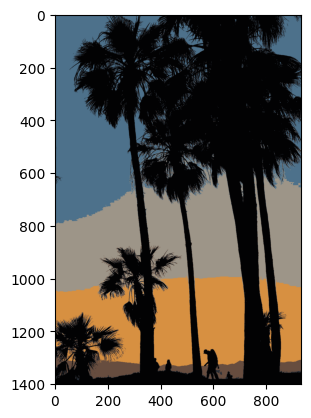

In [30]:
plt.imshow(quantized_image)